# Examen final - 26/07/2023
## Ejercicio 3

### Enunciado

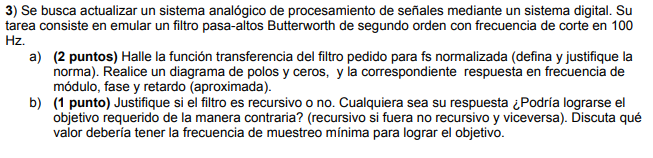

##### Desarrollo tradicional

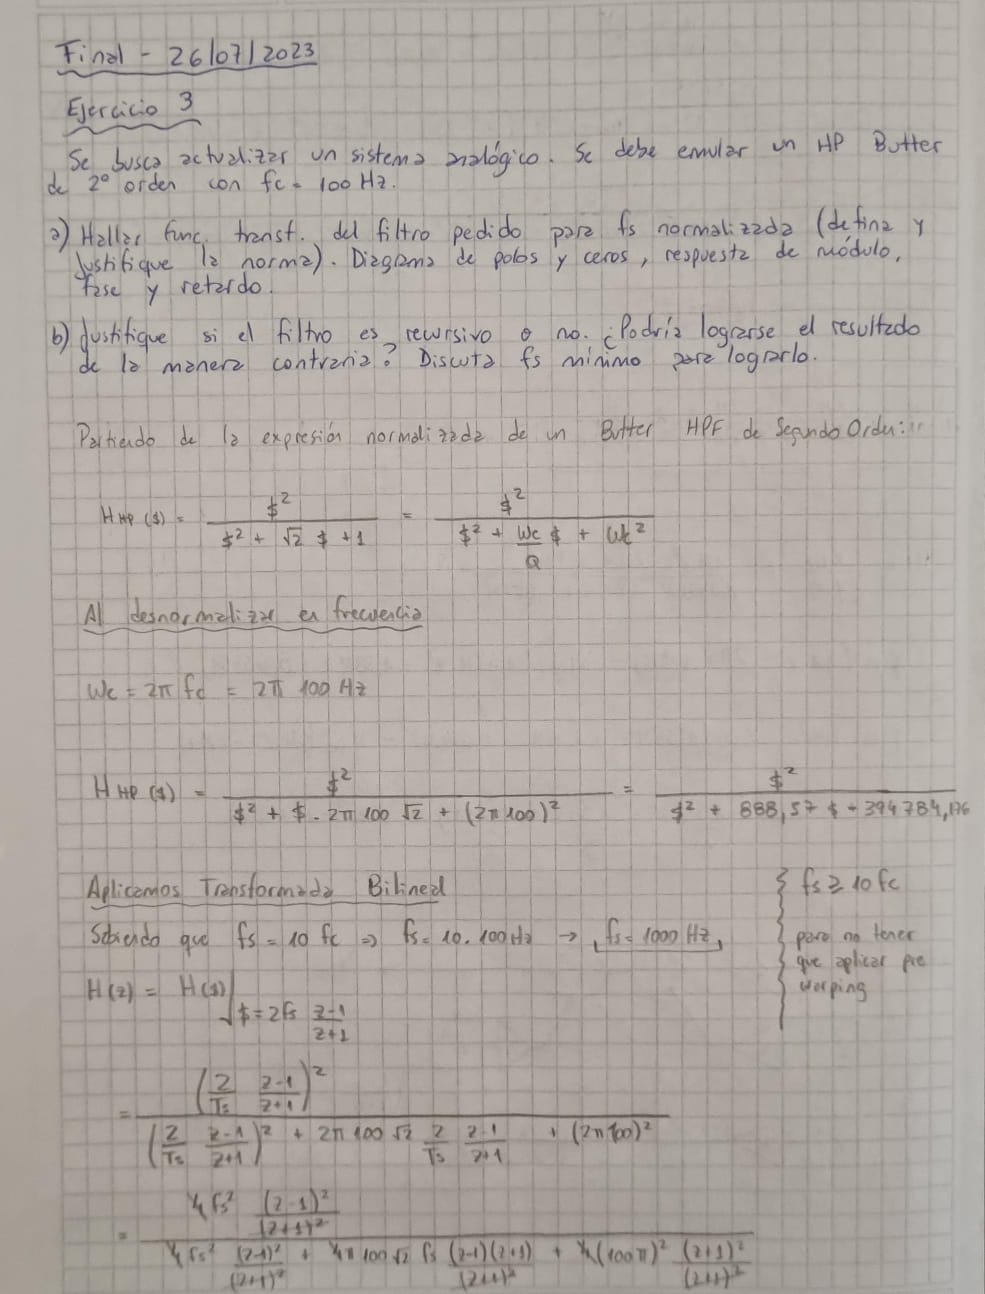

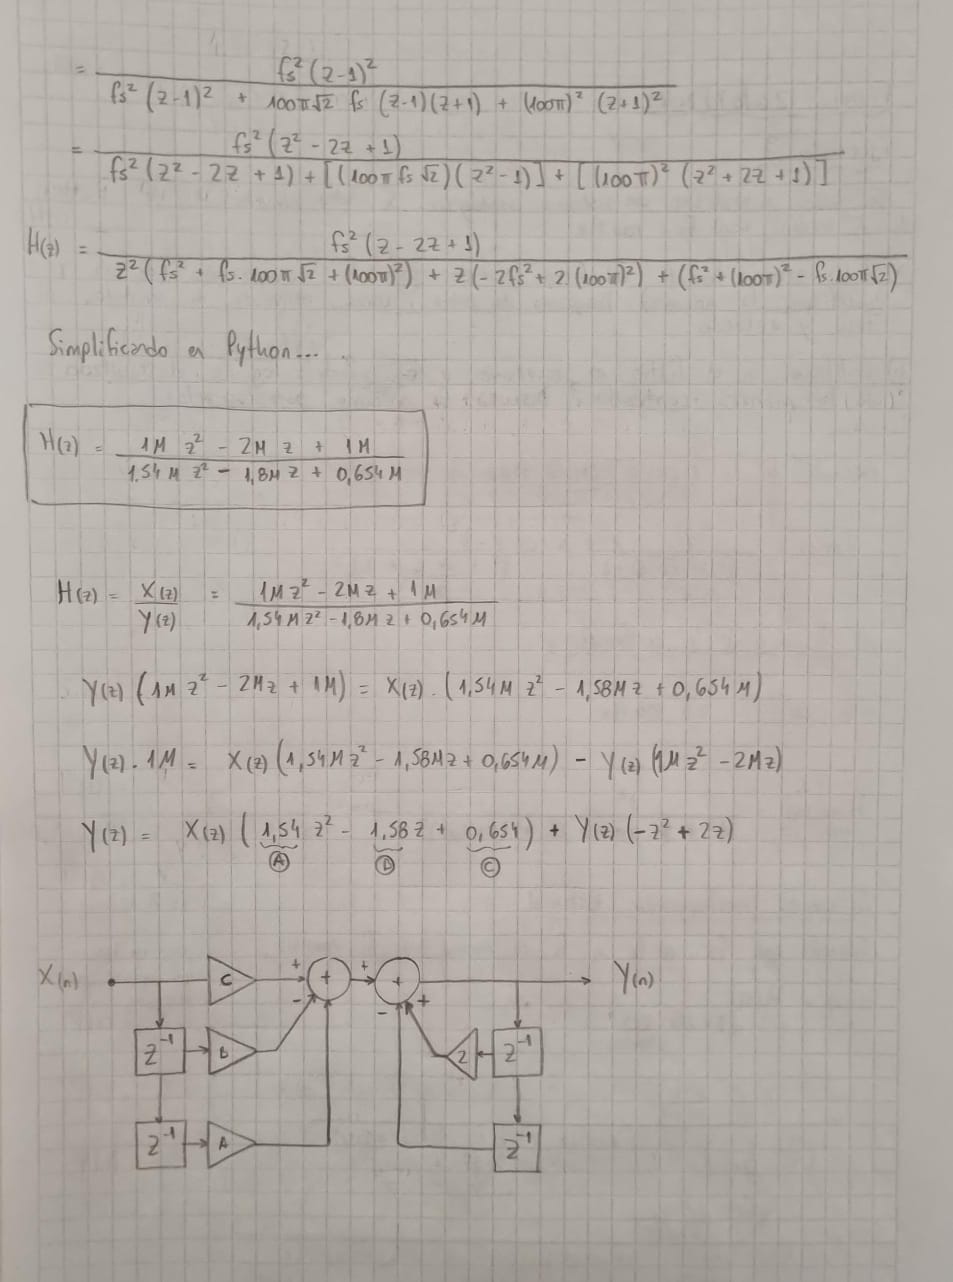

##### Justifique si el filtro es recursivo o no:

Este filtro es recursivo ya que al realizar su diagrama en bloques se ve claramente que posee realimentación de la salida, generando su recursión. Esto también se puede validar desde las propiedades de los filtros IIR dado que poseen al menos un polo fuera del origen, como en este caso.

Para que este filtro deje de ser recursivo, se debe contar únicamente con polos en el origen, evitando así la realimentación de la salida. Eso lo podemos forzar desde la matemática, por lo cual:

* $  - 2 f_s^2 + 2(100 \pi)^2 = 0$
* $ f_s^2 + (100 \pi)^2 - 100 \pi \sqrt{2} f_s = 0$

No existe una $f_s$ tal que se cumplan ambas condiciones, por lo cual este filtro no puede realizarse como FIR.

##### $F_s$ mínima para el filtro

Para trabajar en una zona lineal y no tener que aplicar prewarping, al momento de convertir el filtro analógico en un filtro digital utilizando la transformada bilineal, debemos tomar como condición de diseño:

$$ f_s >= 10 f_{max} $$

El **prewarping** es un proceso por el cual la señal de entrada al filtro se deforma previamente para contrarestar la no linealidad producida por no estar muestreada con la velocidad suficiente.

Sería ideal haber elegido $f_s = 2000Hz$ para que la frecuencia de Nyquist quede definida en $1000Hz$ y nos permita trabajar con 1 década de ancho de banda. Lo definido para el ejercicio, con $f_s = 1000Hz$ es correcto, pero nos limita el ancho de banda del filtro de $100Hz$ a $500Hz$, ya que al tratarse de un filtro pasa alto, la limitación del ancho de banda es generada por $f_N$ en vez de $f_c$. Concluyendo, el desarrollo es correcto, pero se podría haber tenido esta consideración para plantearlo.

##### Desarrollo mediante software

In [2]:
def plot_module_response(tfz):
    # Calculate frequency response
    w, h = sig.freqz(tfz.num, tfz.den)

    # Normalize frequency axis
    freq_normalized = w / np.pi

    # Create a figure with vertical layout
    fig = plt.figure(figsize=(20, 24))

    # Plot Módulo
    ax1 = fig.add_subplot(311)
    ax1.plot(freq_normalized, 20 * np.log10(np.abs(h)))
    ax1.set_title('Respuesta de Módulo')
    ax1.set_ylabel('Módulo [dB]')
    ax1.grid()
    ax1.annotate('', xy=(1, 0), xytext=(0, 0),
                  arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1))
    ax1.set_xlim(0, 1)
    
    # Add double-ended arrows from plot edges
    xlim = plt.xlim()
    ylim = plt.ylim()
    arrowprops = dict(facecolor='black', arrowstyle='<->', linewidth=1)
    plt.annotate('', xy=(xlim[0], 0), xytext=(xlim[1], 0), arrowprops=arrowprops)
    plt.annotate('', xy=(0, ylim[0]), xytext=(0, ylim[1]), arrowprops=arrowprops)

    plt.tight_layout()
    plt.show()

def plot_frequency_response(tfz):
    # Calculate frequency response
    w, h = sig.freqz(tfz.num, tfz.den)

    # Normalize frequency axis
    freq_normalized = w / np.pi

    # Create a figure with vertical layout
    fig = plt.figure(figsize=(20, 24))

    # Plot Módulo
    ax1 = fig.add_subplot(311)
    ax1.plot(freq_normalized, 20 * np.log10(np.abs(h)))
    ax1.set_title('Respuesta de Módulo')
    ax1.set_ylabel('Módulo [dB]')
    ax1.grid()
    ax1.annotate('', xy=(1, 0), xytext=(0, 0),
                  arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1))
    ax1.set_xlim(0, 1)

    # Plot Fase
    ax2 = fig.add_subplot(312)
    ax2.plot(freq_normalized, np.angle(h))
    ax2.set_title('Respuesta de Fase')
    ax2.set_ylabel('Fase [rad.]')
    ax2.grid()
    ax2.annotate('', xy=(1, 0), xytext=(0, 0),
                  arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1))
    ax2.set_xlim(0, 1)

    # Plot group delay
    ax3 = fig.add_subplot(313)
    gd = -np.diff(np.unwrap(np.angle(h))) / np.diff(w)
    ax3.plot(freq_normalized[1:], gd)
    ax3.set_title('Retardo de Grupo')
    ax3.set_xlabel('Frecuencia normalizada')
    ax3.set_ylabel('Retardo de Grupo [muestras]')
    ax3.grid()
    ax3.annotate('', xy=(1, 0), xytext=(0, 0),
                  arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1))
    ax3.set_xlim(0, 1)
    
    # Find maximum delay and set plot limits
    max_delay_samples = np.ceil(np.max(gd))
    ax3.set_ylim(0, max_delay_samples)

    # Plot poles and zeros in a separate figure
    plt.figure(figsize=(8, 8))
    plt.plot(np.real(tfz.zeros), np.imag(tfz.zeros), 'o', color='blue', markersize=10, fillstyle='none', markeredgewidth=2, label='ceros')
    plt.plot(np.real(tfz.poles), np.imag(tfz.poles), 'x', color='red', markersize=10, markeredgewidth=2, label='polos')
    
    # Plot unit circle
    unit_circle = plt.Circle((0, 0), 1, color='gray', linestyle='--', fill=False)
    plt.gca().add_patch(unit_circle)
    
    plt.title('Polos y ceros')
    plt.xlabel('Real')
    plt.ylabel('Imaginario')
    plt.legend()
    plt.grid()
    
    # Add double-ended arrows from plot edges
    xlim = plt.xlim()
    ylim = plt.ylim()
    arrowprops = dict(facecolor='black', arrowstyle='<->', linewidth=1)
    plt.annotate('', xy=(xlim[0], 0), xytext=(xlim[1], 0), arrowprops=arrowprops)
    plt.annotate('', xy=(0, ylim[0]), xytext=(0, ylim[1]), arrowprops=arrowprops)

    plt.tight_layout()
    plt.show()

C:\Users\Mati\AppData\Local\Temp\ipykernel_7812\3525842031.py:43: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(freq_normalized, 20 * np.log10(np.abs(h)))


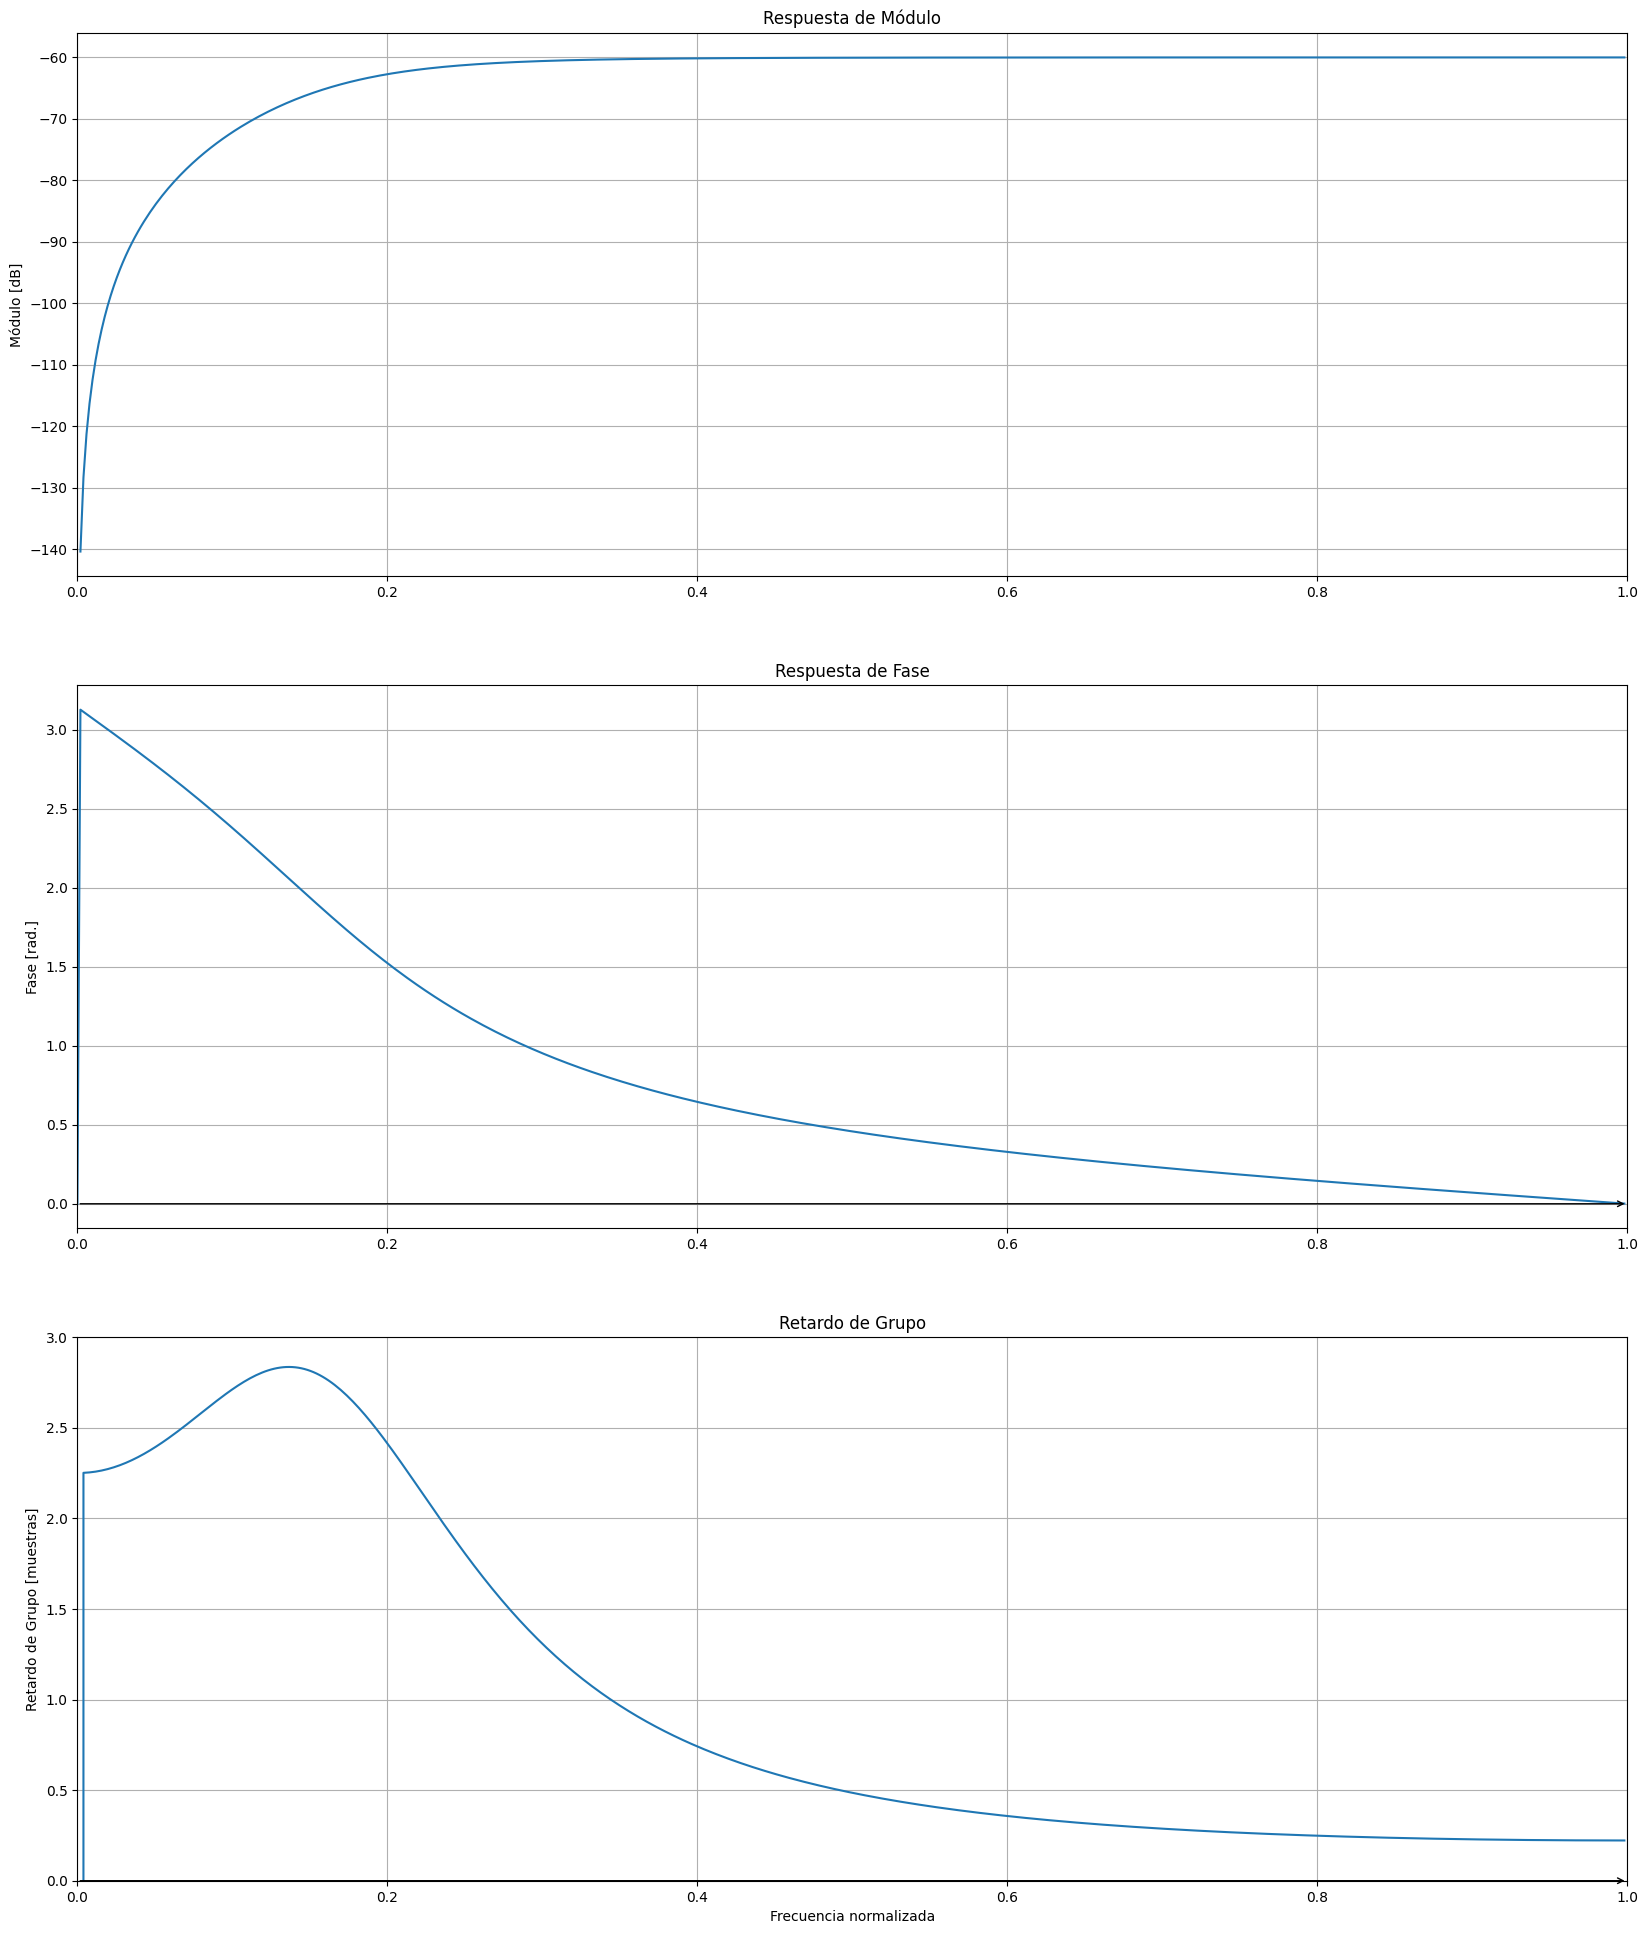

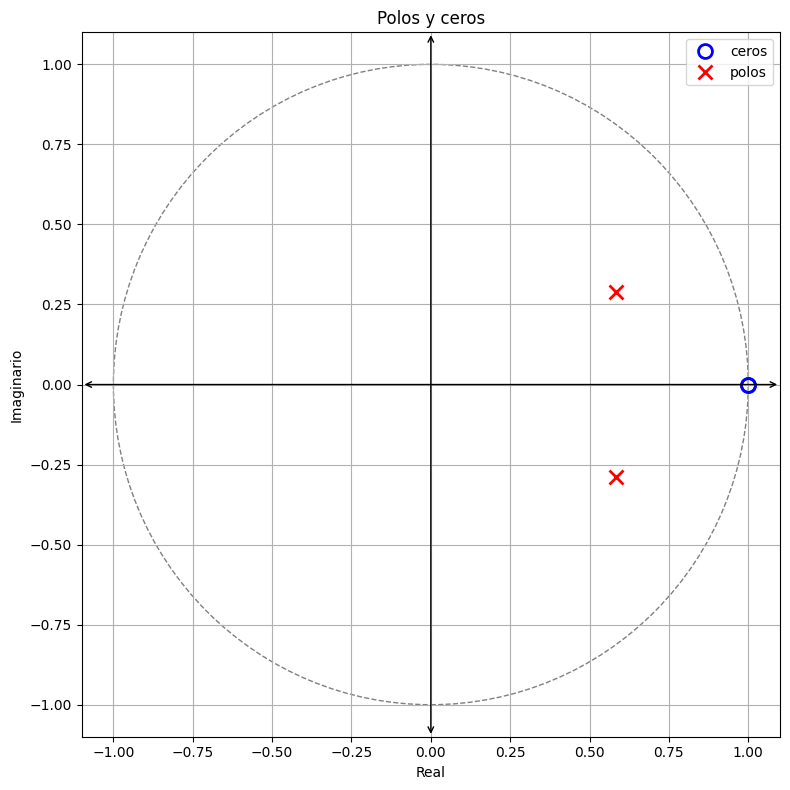

In [4]:
import math
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from engineering_notation import EngNumber

# Definición de variables
f_s = 1000
A = f_s**2 + f_s*100*math.pi*math.sqrt(2) + (100*math.pi)**2
B = -2*f_s**2 + 2* (100*math.pi)**2
C = f_s**2 + (100 * math.pi)**2 - 100*math.pi*math.sqrt(2)*f_s

A_eng = EngNumber(A)
B_eng = EngNumber(B)
C_eng = EngNumber(C)

f_s_eng = EngNumber(f_s**2)

#Definimos bm1 y an1 y dibujamos los gráficos de módulo, fase, retardo de grupo, polos y ceros.
bm1 =  np.array([f_s, -2*f_s, f_s])
an1 =  np.array([A, B, C])

my_df1 = sig.TransferFunction(bm1, an1, dt=1/f_s)
plot_frequency_response(my_df1)